# Klassifikation - Ein grundlegendes ML-Modell 💡

Die Klassifikation versucht, Datenpunkte in verschiedene Kategorien oder Klassen einzuordnen, basierend auf ihren Eigenschaften.
Das Ziel ist es, eine Entscheidungsgrenze zu finden, die die Klassen möglichst gut trennt.

Ein klassisches Beispiel ist die binäre Klassifikation, bei der es zwei Klassen gibt (0 oder  1).

## Beispiel: E-Mail-Spam-Erkennung 📧
Ein häufiges Anwendungsbeispiel für die Klassifikation ist die Spam-Filterung.
Hierbei werden E-Mails basierend auf verschiedenen Merkmalen (z. B. bestimmte Wörter, Absender, Links) in zwei Klassen eingeteilt:

- Klasse 0: Normale E-Mail (kein Spam)
- Klasse 1: Spam-E-Mail

Ein Modell könnte trainiert werden, um anhand der Merkmale vorherzusagen, ob eine E-Mail als Spam eingestuft werden sollte oder nicht.

## Importieren der Bibliotheken

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Generieren eines Klassifikations-Datensatzes (E-Mail-Spam-Erkennungssimulation)

In [ ]:
np.random.seed(42)
X = np.random.randn(200, 2)  # Zwei Features, die beispielsweise Wortanzahl und Anzahl verdächtiger Links repräsentieren
y = (X[:, 0] ** 2 + X[:, 1] ** 2 > 1).astype(int)  # Klassifizierung: 0 = Ham, 1 = Spam

## Aufteilen in Trainings- und Testdaten

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardisieren der Daten

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Erstellen und Trainieren des Modells

In [ ]:
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

## Vorhersagen treffen

In [ ]:
y_pred = model.predict(X_test)

## Bewertung des Modells

In [ ]:
print("Genauigkeit:", accuracy_score(y_test, y_pred))

Genauigkeit: 0.9


## Visualisierung der Klassifikation

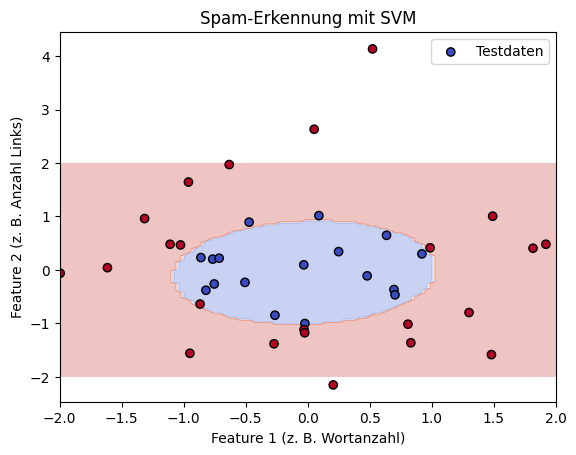

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm, label='Testdaten')
plt.xlabel("Feature 1 (z. B. Wortanzahl)")
plt.ylabel("Feature 2 (z. B. Anzahl Links)")
plt.title("Spam-Erkennung mit SVM")
plt.legend()
plt.show()
